<a href="https://colab.research.google.com/github/Nyon0k/Analytica-PS-2023/blob/main/AnaliseOrganizada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Dataframes base tratados

In [2]:
uf_pib_limpo = pd.read_csv('uf_pib_limpo.csv')
uf_pib_limpo

,ano,id_uf,sigla_uf,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,11,RO,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,11,RO,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,11,RO,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,11,RO,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,11,RO,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293
...,...,...,...,...,...,...,...,...,...,...
508,2016,53,DF,235540044811,29145619376,206394425435,820754661,9662357225,103859865830,92051447720
509,2017,53,DF,244722249337,29120461647,215601787690,828313642,8448768236,108322119432,98002586380
510,2018,53,DF,254817204692,28692287369,226124917323,1022690641,9541298290,113768086938,101792841454
511,2019,53,DF,273613711477,30686607647,242927103829,992393584,9453608031,125261853488,107219248727


In [3]:
uf_educacao_limpo = pd.read_csv('uf_educacao_limpo.csv')
uf_educacao_limpo

,ano,sigla_uf,localizacao,rede,atu_ei,atu_ei_creche,atu_ei_pre_escola,atu_ef,atu_ef_anos_iniciais,atu_ef_anos_finais,...,ied_em_nivel_3,ied_em_nivel_4,ied_em_nivel_5,ied_em_nivel_6,icg_nivel_1,icg_nivel_2,icg_nivel_3,icg_nivel_4,icg_nivel_5,icg_nivel_6
0,2013,AL,total,publica,19.9,21.2,19.5,27.3,24.5,33.7,...,22.9,37.7,19.7,15.6,18.8,24.0,8.3,14.8,27.1,7.0
1,2013,AL,total,total,18.2,18.8,18.0,26.0,22.9,32.5,...,24.7,38.1,17.8,13.4,18.2,25.8,11.0,16.0,23.0,6.0
2,2013,AL,urbana,publica,21.0,21.7,20.7,29.9,25.8,35.1,...,23.2,37.1,19.6,15.8,7.4,27.2,9.3,17.1,28.3,10.7
3,2013,AL,urbana,total,18.2,18.5,18.0,27.5,23.4,33.3,...,25.0,37.6,17.7,13.5,9.3,29.4,14.5,18.9,20.0,7.9
4,2013,CE,total,publica,18.2,17.9,18.4,22.5,21.2,26.0,...,34.1,34.8,13.8,4.9,13.2,25.8,24.8,10.5,20.4,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,2019,SP,urbana,total,15.7,13.1,19.7,25.5,23.8,28.1,...,23.0,47.7,14.4,7.3,30.2,33.2,13.6,16.1,5.1,1.8
683,2019,TO,rural,publica,13.2,13.4,12.3,14.4,15.0,15.9,...,31.5,45.8,10.5,0.8,37.9,25.9,19.9,11.0,5.0,0.3
684,2019,TO,rural,total,13.2,13.4,12.3,14.6,15.2,16.2,...,32.8,44.9,10.3,0.8,37.9,25.8,20.2,11.0,5.0,0.1
685,2019,TO,total,publica,19.1,18.3,19.8,22.7,22.3,25.2,...,20.9,51.1,13.7,2.8,18.9,35.6,22.9,12.1,9.3,1.2


##Dataframes ufs validos

In [4]:
estados_validos = ['RS', 'PE', 'PR', 'RJ', 'CE', 'SC', 'MS', 'AL', 'PA', 'MA', 'PI', 'SP', 'MG', 'ES', 'MT']
estados_invalidos = ['AC', 'AP', 'AM', 'BA', 'DF', 'GO', 'PB', 'RN', 'RO', 'RR', 'SE', 'TO']

In [5]:
# Criando dataframes com apenas dados dos estados acima

# ----- PIB -----

pibs_ufs_validos = uf_pib_limpo
# display(pibs_ufs_validos)

for sigla in estados_invalidos:
  pibs_ufs_validos = pibs_ufs_validos.drop(pibs_ufs_validos[pibs_ufs_validos['sigla_uf'] == sigla].index)

print('----- PIBs UFs Válidos -----')
display(pibs_ufs_validos)

# ----- Educacao -----

educacao_ufs_validos = uf_educacao_limpo
# display(educacao_ufs_validos)

for sigla in estados_invalidos:
  educacao_ufs_validos = educacao_ufs_validos.drop(educacao_ufs_validos[educacao_ufs_validos['sigla_uf'] == sigla].index)

print('----- Educação UFs Válidos -----')
display(educacao_ufs_validos)

----- PIBs UFs Válidos -----


,ano,id_uf,sigla_uf,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
76,2002,15,PA,26482158871,2568294792,23913864078,3465780342,6127765556,9281332265,5038985927
77,2003,15,PA,30270151871,3079543210,27190608658,4032022848,6919947291,10425928911,5812709602
78,2004,15,PA,37272725891,3348291626,33924434262,4231384692,9696801550,13559101289,6437146733
79,2005,15,PA,40522893486,3991798341,36531095140,4621698125,10102356759,14568849663,7238190590
80,2006,15,PA,45983026806,4705277210,41277749601,5094226462,11373927848,16921686954,7887908331
...,...,...,...,...,...,...,...,...,...,...
470,2016,51,MT,123880295558,11965235742,111915059813,25083183867,18327662678,49629725275,18874487993
471,2017,51,MT,126845897787,14528034054,112317863735,22529143287,17045048654,52831420277,19912251528
472,2018,51,MT,137442852834,14748701417,122694151423,25684098881,19398439739,56343006152,21268606648
473,2019,51,MT,142122027969,15503622934,126618405033,27051018424,20585079174,56980389866,22001917567


----- Educação UFs Válidos -----


,ano,sigla_uf,localizacao,rede,atu_ei,atu_ei_creche,atu_ei_pre_escola,atu_ef,atu_ef_anos_iniciais,atu_ef_anos_finais,...,ied_em_nivel_3,ied_em_nivel_4,ied_em_nivel_5,ied_em_nivel_6,icg_nivel_1,icg_nivel_2,icg_nivel_3,icg_nivel_4,icg_nivel_5,icg_nivel_6
0,2013,AL,total,publica,19.9,21.2,19.5,27.3,24.5,33.7,...,22.9,37.7,19.7,15.6,18.8,24.0,8.3,14.8,27.1,7.0
1,2013,AL,total,total,18.2,18.8,18.0,26.0,22.9,32.5,...,24.7,38.1,17.8,13.4,18.2,25.8,11.0,16.0,23.0,6.0
2,2013,AL,urbana,publica,21.0,21.7,20.7,29.9,25.8,35.1,...,23.2,37.1,19.6,15.8,7.4,27.2,9.3,17.1,28.3,10.7
3,2013,AL,urbana,total,18.2,18.5,18.0,27.5,23.4,33.3,...,25.0,37.6,17.7,13.5,9.3,29.4,14.5,18.9,20.0,7.9
4,2013,CE,total,publica,18.2,17.9,18.4,22.5,21.2,26.0,...,34.1,34.8,13.8,4.9,13.2,25.8,24.8,10.5,20.4,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,2019,SP,total,publica,19.5,15.7,22.9,27.2,25.7,29.6,...,18.4,50.3,16.7,8.9,20.9,39.9,14.7,14.1,7.7,2.7
679,2019,SP,total,total,15.7,13.1,19.6,25.4,23.7,28.0,...,23.0,47.8,14.4,7.3,30.5,33.1,13.8,15.7,5.0,1.9
680,2019,SP,urbana,privada,11.6,11.1,12.7,20.0,18.2,23.1,...,34.4,39.3,9.8,4.7,46.5,21.9,12.4,18.5,0.6,0.1
681,2019,SP,urbana,publica,19.5,15.7,23.1,27.4,25.9,29.8,...,18.4,50.2,16.8,9.0,19.9,40.3,14.4,14.5,8.1,2.8


##Dataframes ufs validos dos anos 2013, 2016 e 2019

In [6]:
pibs_ufs_validos_2013 = pibs_ufs_validos.loc[pibs_ufs_validos['ano'] == 2013]
pibs_ufs_validos_2016 = pibs_ufs_validos.loc[pibs_ufs_validos['ano'] == 2016]
pibs_ufs_validos_2019 = pibs_ufs_validos.loc[pibs_ufs_validos['ano'] == 2019]

# display(pibs_ufs_validos_2013)
# display(pibs_ufs_validos_2016)
# display(pibs_ufs_validos_2019)

In [7]:
educacao_ufs_validos_2013 = educacao_ufs_validos.loc[educacao_ufs_validos['ano'] == 2013]
educacao_ufs_validos_2016 = educacao_ufs_validos.loc[educacao_ufs_validos['ano'] == 2016]
educacao_ufs_validos_2019 = educacao_ufs_validos.loc[educacao_ufs_validos['ano'] == 2019]

educacao_ufs_validos_2013 = educacao_ufs_validos_2013.loc[(educacao_ufs_validos_2013['localizacao'] == 'total') & (educacao_ufs_validos_2013['rede'] == 'total')]
educacao_ufs_validos_2016 = educacao_ufs_validos_2016.loc[(educacao_ufs_validos_2016['localizacao'] == 'total') & (educacao_ufs_validos_2016['rede'] == 'total')]
educacao_ufs_validos_2019 = educacao_ufs_validos_2019.loc[(educacao_ufs_validos_2019['localizacao'] == 'total') & (educacao_ufs_validos_2019['rede'] == 'total')]

# display(educacao_ufs_validos_2013)
# display(educacao_ufs_validos_2016)
# display(educacao_ufs_validos_2019)

##Dataframe População por UF

In [8]:
uf_populacao = pd.read_csv('/content/populacao_uf.csv.gz')
uf_populacao

,sigla_uf,ano,populacao,populacao_economicamente_ativa
0,AC,1991,417102,NaN
1,AL,1991,2512658,NaN
2,AM,1991,2102766,NaN
3,AP,1991,289035,NaN
4,BA,1991,11867336,NaN
...,...,...,...,...
832,RS,2021,11466630,9533.0
833,SC,2021,7338473,5947.0
834,SE,2021,2338474,1873.0
835,SP,2021,46649132,38573.0


In [9]:
uf_populacao.isnull().sum()

sigla_uf                            0
ano                                 0
populacao                           0
populacao_economicamente_ativa    567
dtype: int64

##Dataframe População UFs válidos

In [10]:
populacao_ufs_validos = uf_populacao
# display(populacao_ufs_validos)

for sigla in estados_invalidos:
  populacao_ufs_validos = populacao_ufs_validos.drop(populacao_ufs_validos[populacao_ufs_validos['sigla_uf'] == sigla].index)

print('----- Populacao UFs Válidos -----')
display(populacao_ufs_validos['sigla_uf'].unique())

----- Populacao UFs Válidos -----


array(['AL', 'CE', 'ES', 'MA', 'MG', 'MS', 'MT', 'PA', 'PE', 'PI', 'PR',
       'RJ', 'RS', 'SC', 'SP'], dtype=object)

##Dataframe População nos anos 2013, 2016 e 2019

In [11]:
populacao_ufs_validos_2013 = populacao_ufs_validos.loc[populacao_ufs_validos['ano'] == 2013]
populacao_ufs_validos_2016 = populacao_ufs_validos.loc[populacao_ufs_validos['ano'] == 2016]
populacao_ufs_validos_2019 = populacao_ufs_validos.loc[populacao_ufs_validos['ano'] == 2019]

# display(populacao_ufs_validos_2013)
# display(populacao_ufs_validos_2016)
# display(populacao_ufs_validos_2019)

##Funções

In [12]:
def plot_grafico_barras_normal(x, y, x_name, y_name, graph_name):
  plt.bar(x, y)
  plt.title(graph_name)
  plt.xlabel(x_name)
  plt.ylabel(y_name)
  plt.show()

In [13]:
def plotar_barras_grupos(dados, grupo, variaveis):
  dados_grupos = dados.groupby(grupo)[variaveis].sum()
  dados_grupos.plot(kind='bar', figsize=(10, 6))
  plt.xlabel(grupo)
  plt.ylabel('Valor agregado')
  plt.title('VAs por estados')
  plt.legend(variaveis)
  plt.show()

In [14]:
def plotar_barras_grupos_generico(dados, grupo, variaveis, y_name, graph_title):
  dados_grupos = dados.groupby(grupo)[variaveis].sum()
  dados_grupos.plot(kind='bar', figsize=(10, 6))
  plt.xlabel(grupo)
  plt.ylabel(y_name)
  plt.title(graph_title)
  plt.legend(variaveis)
  plt.show()

In [15]:
def plotar_barras_grupos_generico(dados, grupo, variaveis, y_name, graph_title):
  dados_grupos = dados.groupby(grupo)[variaveis].sum()
  dados_grupos.plot(kind='bar', figsize=(10, 6))
  plt.xlabel(grupo)
  plt.ylabel(y_name)
  plt.title(graph_title)
  plt.legend(variaveis)
  plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df, columns):
    # Select columns to normalize
    X = df[columns]
    
    # Create scaler and normalize data
    scaler = MinMaxScaler()
    X_norm = scaler.fit_transform(X)
    
    # Create new dataframe with normalized data and original index
    df_norm = pd.DataFrame(X_norm, index=df.index, columns=columns)
    
    # Add any remaining columns from the original dataframe
    remaining_columns = df.columns.difference(columns)
    for column in remaining_columns:
        df_norm[column] = df[column]
    
    return df_norm

In [17]:
def plot_pib_anos(sigla_uf):
  d2013 = pibs_ufs_validos_2013.loc[pibs_ufs_validos_2013['sigla_uf'] == str(sigla_uf)]
  d2016 = pibs_ufs_validos_2016.loc[pibs_ufs_validos_2016['sigla_uf'] == str(sigla_uf)]
  d2019 = pibs_ufs_validos_2019.loc[pibs_ufs_validos_2019['sigla_uf'] == str(sigla_uf)]

  uf_pibs = pd.DataFrame(d2013)
  uf_pibs = uf_pibs.append(d2016)
  uf_pibs = uf_pibs.append(d2019)
  display(uf_pibs)

  cols = ['ano', 'pib','impostos_liquidos', 'va']
  plotar_barras_grupos(uf_pibs[cols], 'ano', ['pib', 'impostos_liquidos', 'va'])

In [18]:
def plot_educacao_anos(sigla_uf, all_cols, analise_cols, y_name, graph_title):
  d2013 = educacao_ufs_validos_2013.loc[educacao_ufs_validos_2013['sigla_uf'] == str(sigla_uf)]
  d2016 = educacao_ufs_validos_2016.loc[educacao_ufs_validos_2016['sigla_uf'] == str(sigla_uf)]
  d2019 = educacao_ufs_validos_2019.loc[educacao_ufs_validos_2019['sigla_uf'] == str(sigla_uf)]

  uf_pibs = pd.DataFrame(d2013)
  uf_pibs = uf_pibs.append(d2016)
  uf_pibs = uf_pibs.append(d2019)
  # display(uf_pibs)

  plotar_barras_grupos_generico(uf_pibs[all_cols], str(all_cols[0]), analise_cols, y_name, graph_title)

In [19]:
def plot_populacao_anos(sigla_uf, all_cols, analise_cols, y_name, graph_title):
  d2013 = populacao_ufs_validos_2013.loc[populacao_ufs_validos_2013['sigla_uf'] == str(sigla_uf)]
  d2016 = populacao_ufs_validos_2016.loc[populacao_ufs_validos_2016['sigla_uf'] == str(sigla_uf)]
  d2019 = populacao_ufs_validos_2019.loc[populacao_ufs_validos_2019['sigla_uf'] == str(sigla_uf)]

  uf_pibs = pd.DataFrame(d2013)
  uf_pibs = uf_pibs.append(d2016)
  uf_pibs = uf_pibs.append(d2019)
  # display(uf_pibs)

  plotar_barras_grupos_generico(uf_pibs[all_cols], str(all_cols[0]), analise_cols, y_name, graph_title)

In [20]:
def porcentagem_imposto_pib(sigla_uf):
  d2013 = pibs_ufs_validos_2013.loc[pibs_ufs_validos_2013['sigla_uf'] == str(sigla_uf)]
  d2016 = pibs_ufs_validos_2016.loc[pibs_ufs_validos_2016['sigla_uf'] == str(sigla_uf)]
  d2019 = pibs_ufs_validos_2019.loc[pibs_ufs_validos_2019['sigla_uf'] == str(sigla_uf)]

  uf_pibs = pd.DataFrame(d2013)
  uf_pibs = uf_pibs.append(d2016)
  uf_pibs = uf_pibs.append(d2019)
  
  print('Porcentagem de relação entre Impostos e PIB: ' + str((uf_pibs['impostos_liquidos']/uf_pibs['pib']*100).mean()) + '%')

In [21]:
def porcentagem_abandono_pib(sigla_uf):
  d2013 = educacao_ufs_validos_2013.loc[educacao_ufs_validos_2013['sigla_uf'] == str(sigla_uf)]
  d2016 = educacao_ufs_validos_2016.loc[educacao_ufs_validos_2016['sigla_uf'] == str(sigla_uf)]
  d2019 = educacao_ufs_validos_2019.loc[educacao_ufs_validos_2019['sigla_uf'] == str(sigla_uf)]

  uf_pibs = pd.DataFrame(d2013)
  uf_pibs = uf_pibs.append(d2016)
  uf_pibs = uf_pibs.append(d2019)

##Análises 

###PIB, VA, Impostos

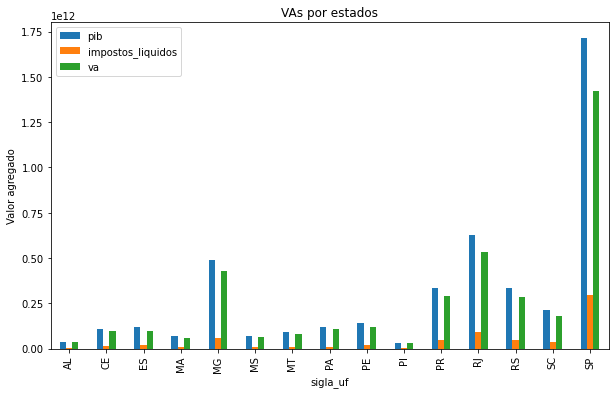

In [22]:
# normalized_data_2013 = normalize_data(pibs_ufs_validos_2013, ['pib', 'impostos_liquidos', 'va'])
# display(normalized_data)
cols = ['sigla_uf', 'pib', 'impostos_liquidos', 'va']
plotar_barras_grupos(pibs_ufs_validos_2013[cols], 'sigla_uf', ['pib', 'impostos_liquidos', 'va'])

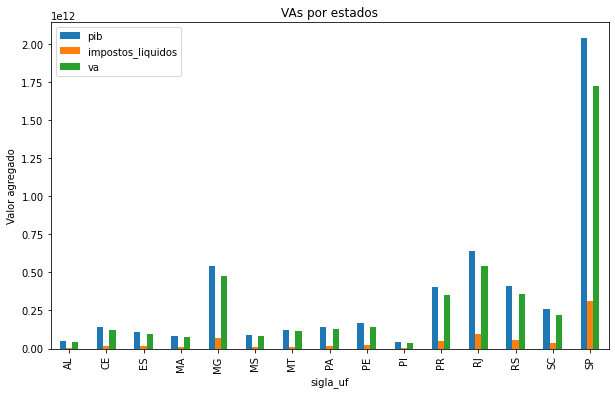

In [23]:
# normalized_data_2016 = normalize_data(pibs_ufs_validos_2016, ['pib', 'impostos_liquidos', 'va'])
# display(normalized_data)
cols = ['sigla_uf', 'pib', 'impostos_liquidos', 'va']
plotar_barras_grupos(pibs_ufs_validos_2016[cols], 'sigla_uf', ['pib', 'impostos_liquidos', 'va'])

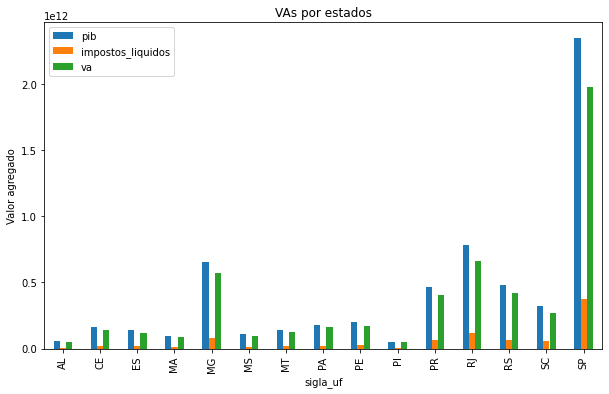

In [24]:
# normalized_data_2019 = normalize_data(pibs_ufs_validos_2019, ['pib', 'impostos_liquidos', 'va'])
# display(normalized_data)
cols = ['sigla_uf', 'pib', 'impostos_liquidos', 'va']
plotar_barras_grupos(pibs_ufs_validos_2019[cols], 'sigla_uf', ['pib', 'impostos_liquidos', 'va'])

In [25]:
# Crescimento PIB entre os anos geral
print('--- Geral ---')
sum_pib_2013 = pibs_ufs_validos_2013['pib'].sum()
sum_pib_2016 = pibs_ufs_validos_2016['pib'].sum()
sum_pib_2019 = pibs_ufs_validos_2019['pib'].sum()

# print(sum_pib_2013)
print(f'Crescimento PIB entre 2013 e 2016: {sum_pib_2016/sum_pib_2013*100-100}%')
print(f'Crescimento PIB entre 2016 e 2019: {sum_pib_2019/sum_pib_2016*100-100}%')

# Crescimento PIB entre os anos SP (maior)
print('--- SP ---')
sum_sp_2013 = float(pibs_ufs_validos_2013.loc[pibs_ufs_validos_2013['sigla_uf'] == 'SP']['pib'])
sum_sp_2016 = float(pibs_ufs_validos_2016.loc[pibs_ufs_validos_2016['sigla_uf'] == 'SP']['pib'])
sum_sp_2019 = float(pibs_ufs_validos_2019.loc[pibs_ufs_validos_2019['sigla_uf'] == 'SP']['pib'])

print(f'Crescimento PIB SP entre 2013 e 2016: {sum_sp_2016/sum_sp_2013*100-100}%')
print(f'Crescimento PIB SP entre 2016 e 2019: {sum_sp_2019/sum_sp_2016*100-100}%')

# Crescimento PIB entre os anos PI (menor)
print('--- PI ---')
sum_pi_2013 = float(pibs_ufs_validos_2013.loc[pibs_ufs_validos_2013['sigla_uf'] == 'PI']['pib'])
sum_pi_2016 = float(pibs_ufs_validos_2016.loc[pibs_ufs_validos_2016['sigla_uf'] == 'PI']['pib'])
sum_pi_2019 = float(pibs_ufs_validos_2019.loc[pibs_ufs_validos_2019['sigla_uf'] == 'PI']['pib'])

print(f'Crescimento PIB PI entre 2013 e 2016: {sum_pi_2016/sum_pi_2013*100-100}%')
print(f'Crescimento PIB PI entre 2016 e 2019: {sum_pi_2019/sum_pi_2016*100-100}%')

--- Geral ---
Crescimento PIB entre 2013 e 2016: 16.491591717755142%
Crescimento PIB entre 2016 e 2019: 18.16330085913576%
--- SP ---
Crescimento PIB SP entre 2013 e 2016: 18.8614575058144%
Crescimento PIB SP entre 2016 e 2019: 15.184769970642037%
--- PI ---
Crescimento PIB PI entre 2013 e 2016: 32.3918793753823%
Crescimento PIB PI entre 2016 e 2019: 27.4376833419242%


###Análise de trajetória dos 2 maiores e menores PIBs

,ano,id_uf,sigla_uf,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
372,2013,35,SP,1715238416566,295812194267,1419426222285,26457535094,323072407694,927683721804,142212557694
375,2016,35,SP,2038757381630,313449931906,1725307449733,35827656845,369476372921,1153330169822,166673250143
378,2019,35,SP,2348338000290,373027516062,1975310484236,33074726102,400871794192,1354778258158,186585705779


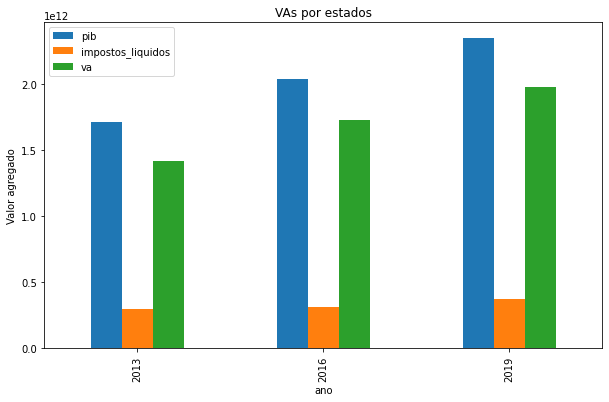

Porcentagem de relação entre Impostos e PIB: 16.16847675467596%


In [26]:
plot_pib_anos('SP')
porcentagem_imposto_pib('SP')

,ano,id_uf,sigla_uf,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
353,2013,33,RJ,628226069362,93265623518,534960445849,2442473270,162747371267,274802728527,94967872787
356,2016,33,RJ,640401206447,98268585581,542132620875,3077081381,98798160628,321677730423,118579648441
359,2019,33,RJ,779927917084,118873682437,661054234647,3031269702,165781864369,358325288748,133915811826


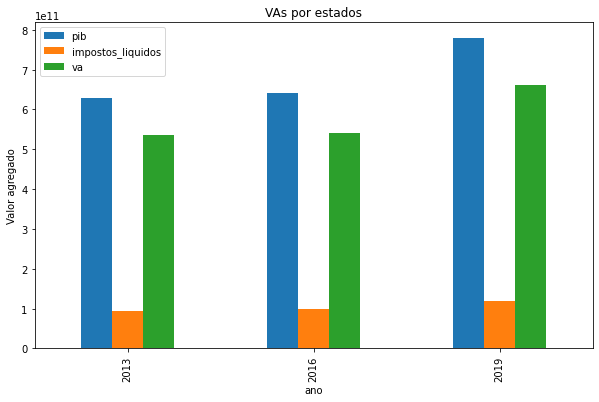

Porcentagem de relação entre Impostos e PIB: 15.144113650762677%


In [27]:
plot_pib_anos('RJ')
porcentagem_imposto_pib('RJ')

,ano,id_uf,sigla_uf,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
163,2013,22,PI,31283593019,3435420593,27848172421,1774815289,3432289131,13068201686,9572866309
166,2016,22,PI,41416936734,4427867590,36989069135,1868311858,4694163220,17798890461,12627703608
169,2019,22,PI,52780784685,5648255450,47132529220,3773393587,5778163095,21456017724,16124954829


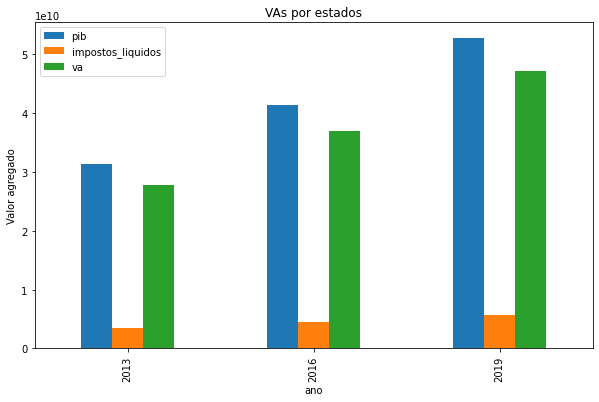

Porcentagem de relação entre Impostos e PIB: 10.7912825594403%


In [28]:
plot_pib_anos('PI')
porcentagem_imposto_pib('PI')

,ano,id_uf,sigla_uf,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
258,2013,27,AL,37282529122,3574439703,33708089428,3494991651,5924941844,14931913960,9356241969
261,2016,27,AL,49468740909,4714082950,44754657956,6752098441,5541012703,20560758051,11900788758
264,2019,27,AL,58963728728,5931434761,53032293962,9459893055,6411652455,23729136025,13431612421


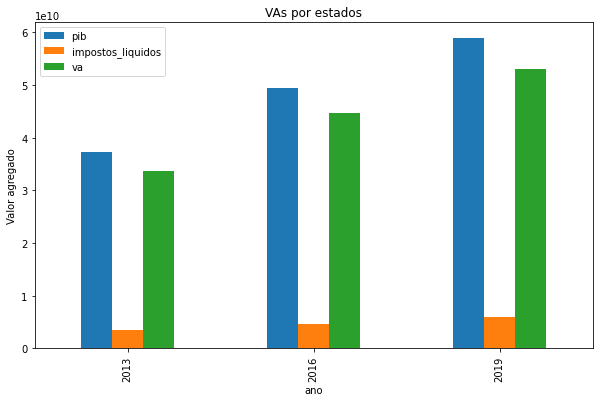

Porcentagem de relação entre Impostos e PIB: 9.72544002973518%


In [29]:
plot_pib_anos('AL')
porcentagem_imposto_pib('AL')

###Média de Horas-Aula diária por UF

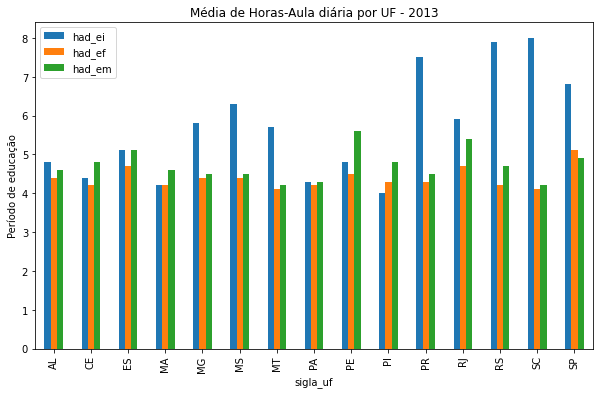

In [30]:
cols = ['sigla_uf', 'had_ei', 'had_ef', 'had_em']
plotar_barras_grupos_generico(educacao_ufs_validos_2013[cols], 'sigla_uf', ['had_ei', 'had_ef', 'had_em'], 'Período de educação', 'Média de Horas-Aula diária por UF - 2013')

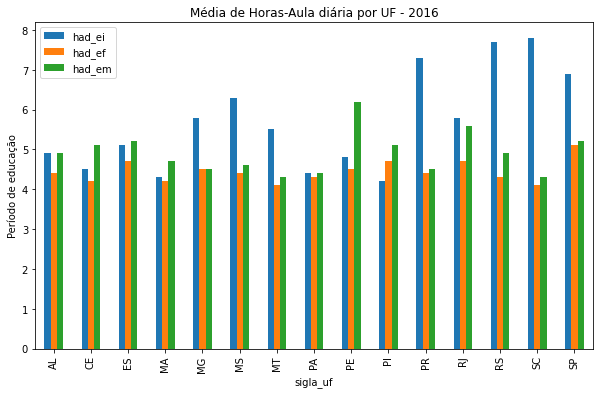

In [31]:
cols = ['sigla_uf', 'had_ei', 'had_ef', 'had_em']
plotar_barras_grupos_generico(educacao_ufs_validos_2016[cols], 'sigla_uf', ['had_ei', 'had_ef', 'had_em'], 'Período de educação', 'Média de Horas-Aula diária por UF - 2016')

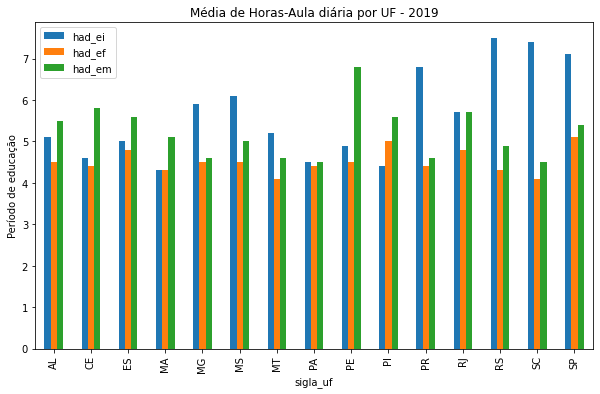

In [32]:
cols = ['sigla_uf', 'had_ei', 'had_ef', 'had_em']
plotar_barras_grupos_generico(educacao_ufs_validos_2019[cols], 'sigla_uf', ['had_ei', 'had_ef', 'had_em'], 'Período de educação', 'Média de Horas-Aula diária por UF - 2019')

In [33]:
# Crescimento média horas-aula diária entre os anos geral
print('--- Geral ---')
sum_horas_2013 = educacao_ufs_validos_2013[['had_ei', 'had_ef', 'had_em']].sum().sum()
sum_horas_2016 = educacao_ufs_validos_2016[['had_ei', 'had_ef', 'had_em']].sum().sum()
sum_horas_2019 = educacao_ufs_validos_2019[['had_ei', 'had_ef', 'had_em']].sum().sum()

print(sum_horas_2013)
print(sum_horas_2016)
print(sum_horas_2019)

print(f'Crescimento média horas-aula diária entre 2013 e 2016: {sum_horas_2016/sum_horas_2013*100-100}%')
print(f'Crescimento média horas-aula diária entre 2016 e 2019: {sum_horas_2019/sum_horas_2016*100-100}%')

# Crescimento média horas-aula diária entre os anos SP (maior)
print('--- SP ---')
sum_sp_2013 = float(educacao_ufs_validos_2013.loc[educacao_ufs_validos_2013['sigla_uf'] == 'SP'][['had_ei', 'had_ef', 'had_em']].sum().sum())
sum_sp_2016 = float(educacao_ufs_validos_2016.loc[educacao_ufs_validos_2016['sigla_uf'] == 'SP'][['had_ei', 'had_ef', 'had_em']].sum().sum())
sum_sp_2019 = float(educacao_ufs_validos_2019.loc[educacao_ufs_validos_2019['sigla_uf'] == 'SP'][['had_ei', 'had_ef', 'had_em']].sum().sum())

print(sum_sp_2013)
print(sum_sp_2016)
print(sum_sp_2019)

print(f'Crescimento média horas-aula diária SP entre 2013 e 2016: {sum_sp_2016/sum_sp_2013*100-100}%')
print(f'Crescimento média horas-aula diária SP entre 2016 e 2019: {sum_sp_2019/sum_sp_2016*100-100}%')

# Crescimento média horas-aula diária entre os anos PI (menor)
print('--- PI ---')
sum_pi_2013 = float(educacao_ufs_validos_2013.loc[educacao_ufs_validos_2013['sigla_uf'] == 'PI'][['had_ei', 'had_ef', 'had_em']].sum().sum())
sum_pi_2016 = float(educacao_ufs_validos_2016.loc[educacao_ufs_validos_2016['sigla_uf'] == 'PI'][['had_ei', 'had_ef', 'had_em']].sum().sum())
sum_pi_2019 = float(educacao_ufs_validos_2019.loc[educacao_ufs_validos_2019['sigla_uf'] == 'PI'][['had_ei', 'had_ef', 'had_em']].sum().sum())

print(sum_pi_2013)
print(sum_pi_2016)
print(sum_pi_2019)

print(f'Crescimento média horas-aula diária PI entre 2013 e 2016: {sum_pi_2016/sum_pi_2013*100-100}%')
print(f'Crescimento média horas-aula diária PI entre 2016 e 2019: {sum_pi_2019/sum_pi_2016*100-100}%')

--- Geral ---
222.0
225.39999999999998
230.4
Crescimento média horas-aula diária entre 2013 e 2016: 1.5315315315315132%
Crescimento média horas-aula diária entre 2016 e 2019: 2.218278615794162%
--- SP ---
16.799999999999997
17.2
17.6
Crescimento média horas-aula diária SP entre 2013 e 2016: 2.380952380952394%
Crescimento média horas-aula diária SP entre 2016 e 2019: 2.3255813953488484%
--- PI ---
13.100000000000001
14.0
15.0
Crescimento média horas-aula diária PI entre 2013 e 2016: 6.870229007633569%
Crescimento média horas-aula diária PI entre 2016 e 2019: 7.142857142857139%


###Taxa de abandono por UF

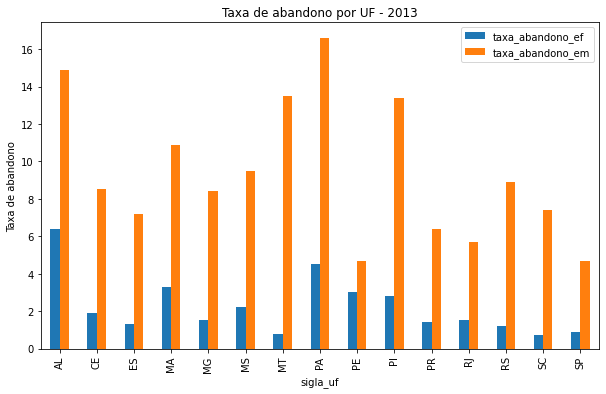

In [34]:
cols = ['sigla_uf', 'taxa_abandono_ef', 'taxa_abandono_em']
plotar_barras_grupos_generico(educacao_ufs_validos_2013[cols], 'sigla_uf', ['taxa_abandono_ef', 'taxa_abandono_em'], 'Taxa de abandono', 'Taxa de abandono por UF - 2013')

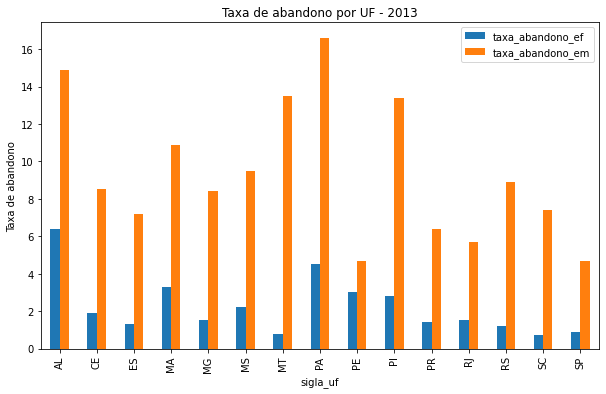

In [35]:
cols = ['sigla_uf', 'taxa_abandono_ef', 'taxa_abandono_em']
plotar_barras_grupos_generico(educacao_ufs_validos_2013[cols], 'sigla_uf', ['taxa_abandono_ef', 'taxa_abandono_em'], 'Taxa de abandono', 'Taxa de abandono por UF - 2013')

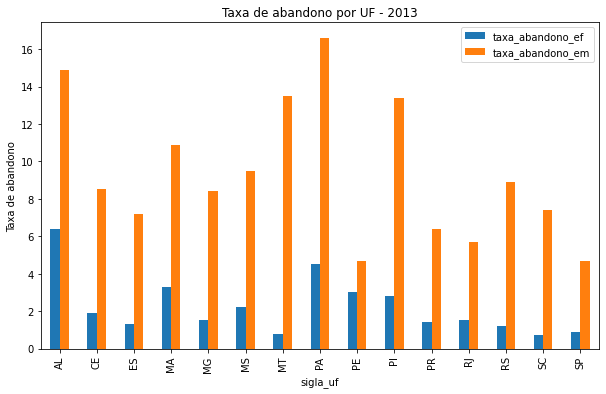

In [36]:
cols = ['sigla_uf', 'taxa_abandono_ef', 'taxa_abandono_em']
plotar_barras_grupos_generico(educacao_ufs_validos_2013[cols], 'sigla_uf', ['taxa_abandono_ef', 'taxa_abandono_em'], 'Taxa de abandono', 'Taxa de abandono por UF - 2013')

In [37]:
# Variação entre os anos geral
print('--- Geral ---')
sum_2013 = educacao_ufs_validos_2013[['taxa_abandono_ef', 'taxa_abandono_em']].sum().sum()
sum_2016 = educacao_ufs_validos_2016[['taxa_abandono_ef', 'taxa_abandono_em']].sum().sum()
sum_2019 = educacao_ufs_validos_2019[['taxa_abandono_ef', 'taxa_abandono_em']].sum().sum()

print(sum_2013)
print(sum_2016)
print(sum_2019)

print(f'Variação taxa abandono entre 2013 e 2016: {sum_2016/sum_2013*100-100}%')
print(f'Variação taxa abandono entre 2016 e 2019: {sum_2019/sum_2016*100-100}%')

# Variação entre os anos SP (maior)
print('--- SP ---')
sum_sp_2013 = float(educacao_ufs_validos_2013.loc[educacao_ufs_validos_2013['sigla_uf'] == 'SP'][['taxa_abandono_ef', 'taxa_abandono_em']].sum().sum())
sum_sp_2016 = float(educacao_ufs_validos_2016.loc[educacao_ufs_validos_2016['sigla_uf'] == 'SP'][['taxa_abandono_ef', 'taxa_abandono_em']].sum().sum())
sum_sp_2019 = float(educacao_ufs_validos_2019.loc[educacao_ufs_validos_2019['sigla_uf'] == 'SP'][['taxa_abandono_ef', 'taxa_abandono_em']].sum().sum())

print(sum_sp_2013)
print(sum_sp_2016)
print(sum_sp_2019)

print(f'Variação taxa abandono SP entre 2013 e 2016: {sum_sp_2016/sum_sp_2013*100-100}%')
print(f'Variação taxa abandono SP entre 2016 e 2019: {sum_sp_2019/sum_sp_2016*100-100}%')

# Variação entre os anos PI (menor)
print('--- PI ---')
sum_pi_2013 = float(educacao_ufs_validos_2013.loc[educacao_ufs_validos_2013['sigla_uf'] == 'PI'][['taxa_abandono_ef', 'taxa_abandono_em']].sum().sum())
sum_pi_2016 = float(educacao_ufs_validos_2016.loc[educacao_ufs_validos_2016['sigla_uf'] == 'PI'][['taxa_abandono_ef', 'taxa_abandono_em']].sum().sum())
sum_pi_2019 = float(educacao_ufs_validos_2019.loc[educacao_ufs_validos_2019['sigla_uf'] == 'PI'][['taxa_abandono_ef', 'taxa_abandono_em']].sum().sum())

print(sum_pi_2013)
print(sum_pi_2016)
print(sum_pi_2019)

print(f'Variação taxa abandono PI entre 2013 e 2016: {sum_pi_2016/sum_pi_2013*100-100}%')
print(f'Variação taxa abandono PI entre 2016 e 2019: {sum_pi_2019/sum_pi_2016*100-100}%')

--- Geral ---
174.10000000000002
139.6
91.69999999999999
Variação taxa abandono entre 2013 e 2016: -19.81619758759335%
Variação taxa abandono entre 2016 e 2019: -34.31232091690545%
--- SP ---
5.6000000000000005
4.4
2.4
Variação taxa abandono SP entre 2013 e 2016: -21.42857142857143%
Variação taxa abandono SP entre 2016 e 2019: -45.45454545454546%
--- PI ---
16.2
12.799999999999999
8.5
Variação taxa abandono PI entre 2013 e 2016: -20.98765432098766%
Variação taxa abandono PI entre 2016 e 2019: -33.59375%


###Análise das duas maiores e menores taxas de abandono

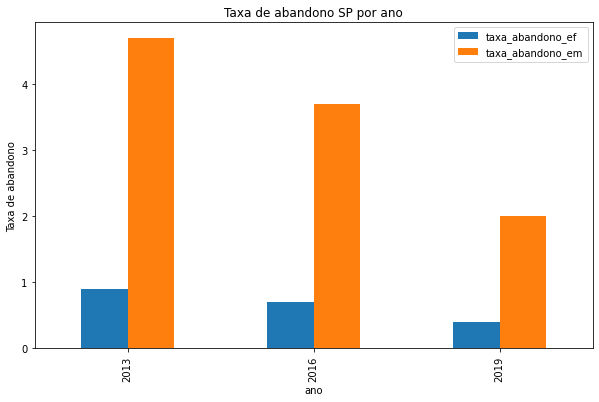

In [38]:
cols1 = ['ano', 'taxa_abandono_ef', 'taxa_abandono_em']
cols2 = ['taxa_abandono_ef', 'taxa_abandono_em']
plot_educacao_anos('SP', cols1, cols2, 'Taxa de abandono', 'Taxa de abandono SP por ano')

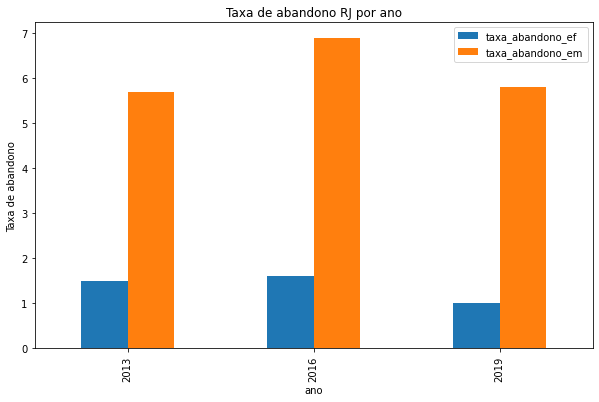

In [39]:
plot_educacao_anos('RJ', cols1, cols2, 'Taxa de abandono', 'Taxa de abandono RJ por ano')

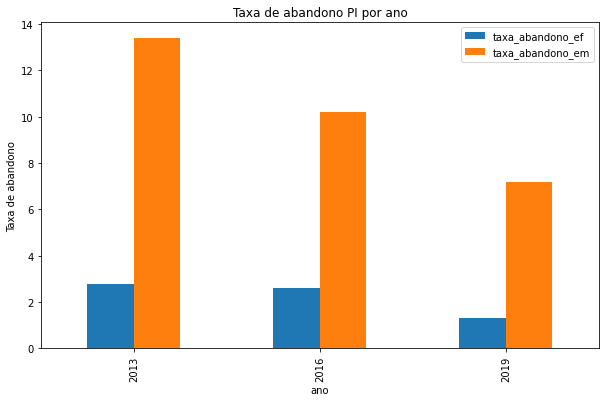

In [40]:
plot_educacao_anos('PI', cols1, cols2, 'Taxa de abandono', 'Taxa de abandono PI por ano')

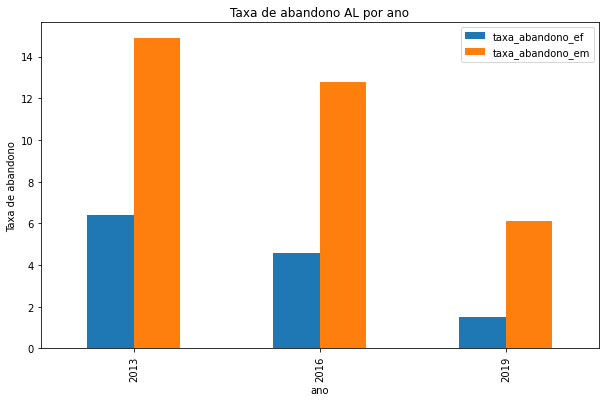

In [41]:
plot_educacao_anos('AL', cols1, cols2, 'Taxa de abandono', 'Taxa de abandono AL por ano')

###Taxa de Não (nível de ensino) por UF

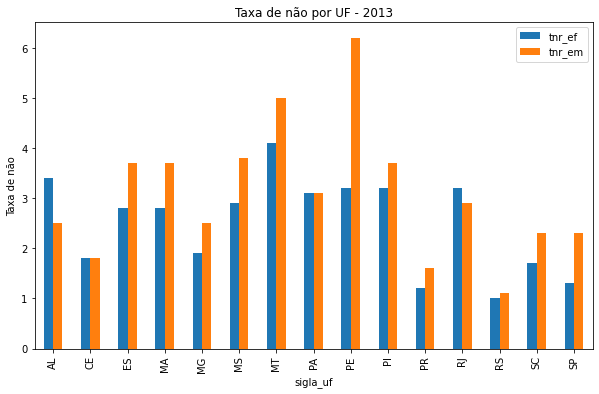

In [42]:
cols = ['sigla_uf', 'tnr_ef', 'tnr_em']
plotar_barras_grupos_generico(educacao_ufs_validos_2013[cols], 'sigla_uf', ['tnr_ef', 'tnr_em'], 'Taxa de não', 'Taxa de não por UF - 2013')

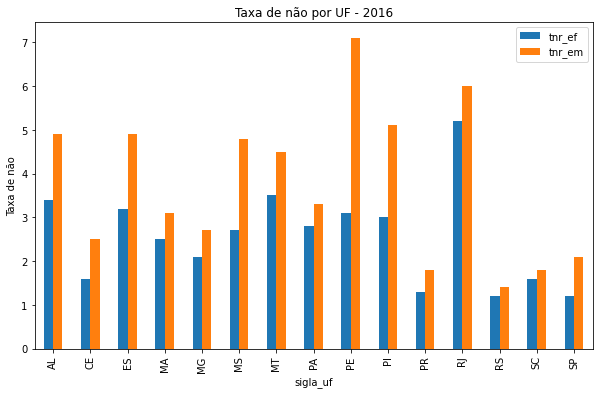

In [43]:
cols = ['sigla_uf', 'tnr_ef', 'tnr_em']
plotar_barras_grupos_generico(educacao_ufs_validos_2016[cols], 'sigla_uf', ['tnr_ef', 'tnr_em'], 'Taxa de não', 'Taxa de não por UF - 2016')

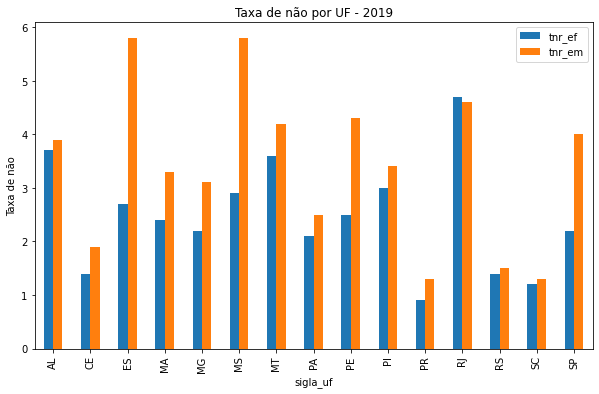

In [44]:
cols = ['sigla_uf', 'tnr_ef', 'tnr_em']
plotar_barras_grupos_generico(educacao_ufs_validos_2019[cols], 'sigla_uf', ['tnr_ef', 'tnr_em'], 'Taxa de não', 'Taxa de não por UF - 2019')

In [45]:
# Variação entre os anos geral
colunas = ['tnr_ef', 'tnr_em']

print('--- Geral ---')
sum_2013 = educacao_ufs_validos_2013[colunas].sum().sum()
sum_2016 = educacao_ufs_validos_2016[colunas].sum().sum()
sum_2019 = educacao_ufs_validos_2019[colunas].sum().sum()

print(sum_2013)
print(sum_2016)
print(sum_2019)

print(f'Variação taxa de não entre 2013 e 2016: {sum_2016/sum_2013*100-100}%')
print(f'Variação taxa de não entre 2016 e 2019: {sum_2019/sum_2016*100-100}%')

# Variação entre os anos SP (maior)
print('--- SP ---')
sum_sp_2013 = float(educacao_ufs_validos_2013.loc[educacao_ufs_validos_2013['sigla_uf'] == 'SP'][colunas].sum().sum())
sum_sp_2016 = float(educacao_ufs_validos_2016.loc[educacao_ufs_validos_2016['sigla_uf'] == 'SP'][colunas].sum().sum())
sum_sp_2019 = float(educacao_ufs_validos_2019.loc[educacao_ufs_validos_2019['sigla_uf'] == 'SP'][colunas].sum().sum())

print(sum_sp_2013)
print(sum_sp_2016)
print(sum_sp_2019)

print(f'Variação taxa de não SP entre 2013 e 2016: {sum_sp_2016/sum_sp_2013*100-100}%')
print(f'Variação taxa de não SP entre 2016 e 2019: {sum_sp_2019/sum_sp_2016*100-100}%')

# Variação entre os anos PI (menor)
print('--- PI ---')
sum_pi_2013 = float(educacao_ufs_validos_2013.loc[educacao_ufs_validos_2013['sigla_uf'] == 'PI'][colunas].sum().sum())
sum_pi_2016 = float(educacao_ufs_validos_2016.loc[educacao_ufs_validos_2016['sigla_uf'] == 'PI'][colunas].sum().sum())
sum_pi_2019 = float(educacao_ufs_validos_2019.loc[educacao_ufs_validos_2019['sigla_uf'] == 'PI'][colunas].sum().sum())

print(sum_pi_2013)
print(sum_pi_2016)
print(sum_pi_2019)

print(f'Variação taxa de não PI entre 2013 e 2016: {sum_pi_2016/sum_pi_2013*100-100}%')
print(f'Variação taxa de não PI entre 2016 e 2019: {sum_pi_2019/sum_pi_2016*100-100}%')

--- Geral ---
83.8
94.4
87.8
Variação taxa de não entre 2013 e 2016: 12.649164677804308%
Variação taxa de não entre 2016 e 2019: -6.991525423728817%
--- SP ---
3.5999999999999996
3.3
6.2
Variação taxa de não SP entre 2013 e 2016: -8.333333333333329%
Variação taxa de não SP entre 2016 e 2019: 87.87878787878788%
--- PI ---
6.9
8.1
6.4
Variação taxa de não PI entre 2013 e 2016: 17.39130434782608%
Variação taxa de não PI entre 2016 e 2019: -20.987654320987644%


###Análise das dua maiores e menores taxas de não - EM

In [46]:
cols1 = ['ano', 'tnr_ef', 'tnr_em']
cols2 = ['tnr_ef', 'tnr_em']

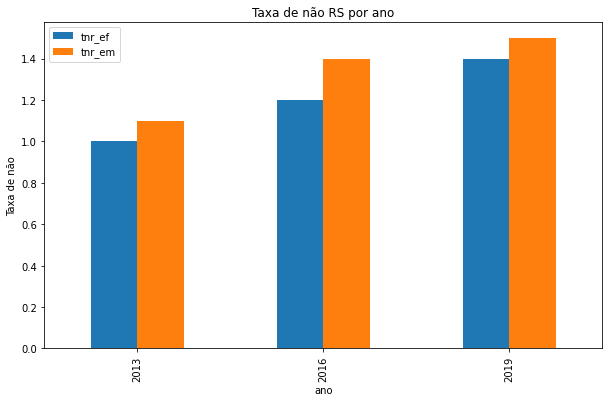

In [47]:
plot_educacao_anos('RS', cols1, cols2, 'Taxa de não', 'Taxa de não RS por ano')

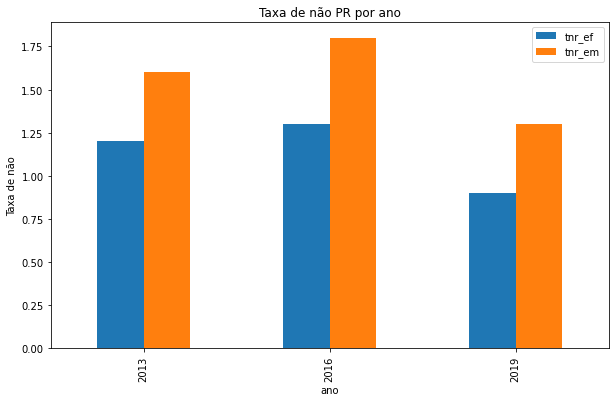

In [48]:
plot_educacao_anos('PR', cols1, cols2, 'Taxa de não', 'Taxa de não PR por ano')

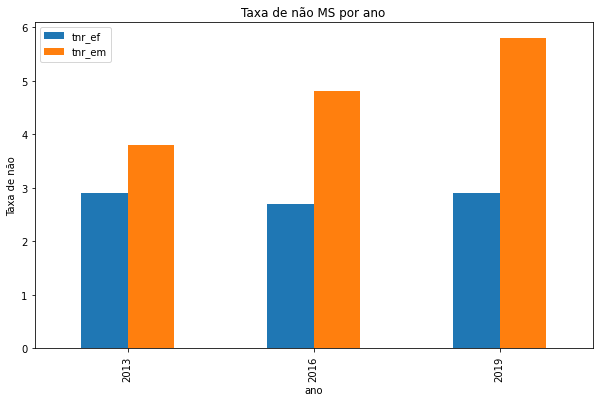

In [49]:
plot_educacao_anos('MS', cols1, cols2, 'Taxa de não', 'Taxa de não MS por ano')

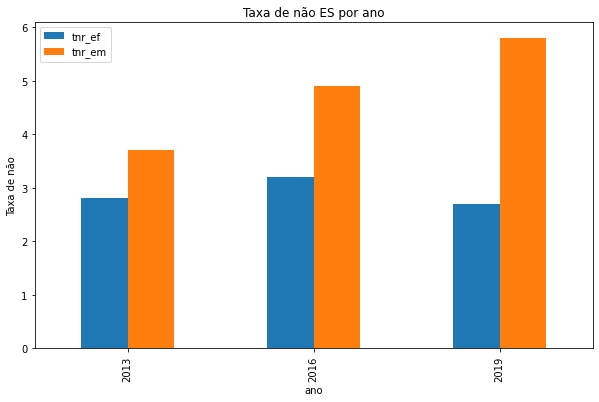

In [50]:
plot_educacao_anos('ES', cols1, cols2, 'Taxa de não', 'Taxa de não ES por ano')

###Taxa de aprovação por UF

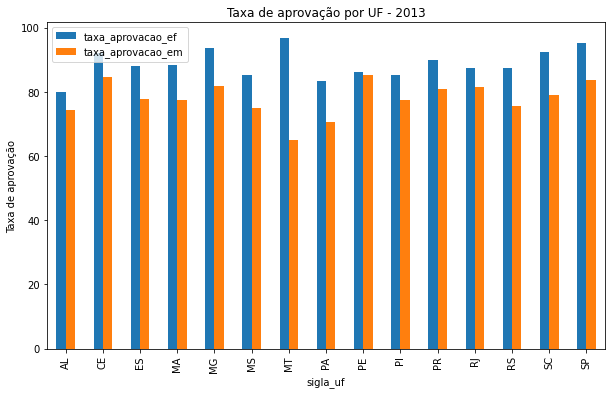

In [51]:
cols = ['sigla_uf', 'taxa_aprovacao_ef', 'taxa_aprovacao_em']
plotar_barras_grupos_generico(educacao_ufs_validos_2013[cols], 'sigla_uf', ['taxa_aprovacao_ef', 'taxa_aprovacao_em'], 'Taxa de aprovação', 'Taxa de aprovação por UF - 2013')

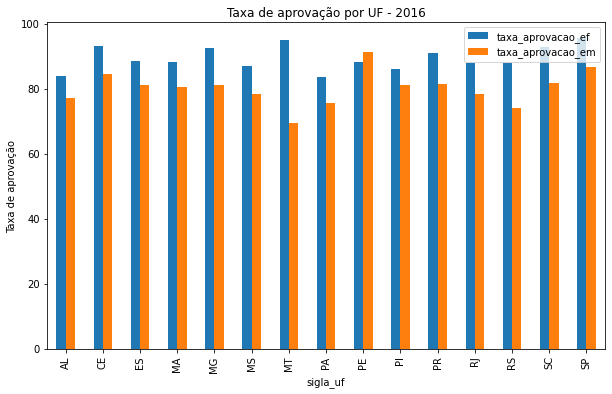

In [52]:
cols = ['sigla_uf', 'taxa_aprovacao_ef', 'taxa_aprovacao_em']
plotar_barras_grupos_generico(educacao_ufs_validos_2016[cols], 'sigla_uf', ['taxa_aprovacao_ef', 'taxa_aprovacao_em'], 'Taxa de aprovação', 'Taxa de aprovação por UF - 2016')

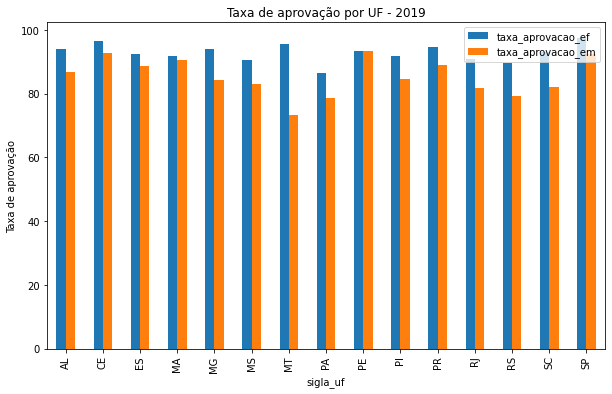

In [53]:
cols = ['sigla_uf', 'taxa_aprovacao_ef', 'taxa_aprovacao_em']
plotar_barras_grupos_generico(educacao_ufs_validos_2019[cols], 'sigla_uf', ['taxa_aprovacao_ef', 'taxa_aprovacao_em'], 'Taxa de aprovação', 'Taxa de aprovação por UF - 2019')

In [54]:
# Variação entre os anos geral
colunas = ['taxa_aprovacao_ef', 'taxa_aprovacao_em']

print('--- Geral ---')
sum_2013 = educacao_ufs_validos_2013[colunas].sum().sum()
sum_2016 = educacao_ufs_validos_2016[colunas].sum().sum()
sum_2019 = educacao_ufs_validos_2019[colunas].sum().sum()

print(sum_2013)
print(sum_2016)
print(sum_2019)

print(f'Variação taxa de aprovação entre 2013 e 2016: {sum_2016/sum_2013*100-100}%')
print(f'Variação taxa de aprovação entre 2016 e 2019: {sum_2019/sum_2016*100-100}%')

# Variação entre os anos SP (maior)
print('--- SP ---')
sum_sp_2013 = float(educacao_ufs_validos_2013.loc[educacao_ufs_validos_2013['sigla_uf'] == 'SP'][colunas].sum().sum())
sum_sp_2016 = float(educacao_ufs_validos_2016.loc[educacao_ufs_validos_2016['sigla_uf'] == 'SP'][colunas].sum().sum())
sum_sp_2019 = float(educacao_ufs_validos_2019.loc[educacao_ufs_validos_2019['sigla_uf'] == 'SP'][colunas].sum().sum())

print(sum_sp_2013)
print(sum_sp_2016)
print(sum_sp_2019)

print(f'Variação taxa de aprovação SP entre 2013 e 2016: {sum_sp_2016/sum_sp_2013*100-100}%')
print(f'Variação taxa de aprovação SP entre 2016 e 2019: {sum_sp_2019/sum_sp_2016*100-100}%')

# Variação entre os anos PI (menor)
print('--- PI ---')
sum_pi_2013 = float(educacao_ufs_validos_2013.loc[educacao_ufs_validos_2013['sigla_uf'] == 'PI'][colunas].sum().sum())
sum_pi_2016 = float(educacao_ufs_validos_2016.loc[educacao_ufs_validos_2016['sigla_uf'] == 'PI'][colunas].sum().sum())
sum_pi_2019 = float(educacao_ufs_validos_2019.loc[educacao_ufs_validos_2019['sigla_uf'] == 'PI'][colunas].sum().sum())

print(sum_pi_2013)
print(sum_pi_2016)
print(sum_pi_2019)

print(f'Variação taxa de aprovação PI entre 2013 e 2016: {sum_pi_2016/sum_pi_2013*100-100}%')
print(f'Variação taxa de aprovação PI entre 2016 e 2019: {sum_pi_2019/sum_pi_2016*100-100}%')

--- Geral ---
2500.8
2542.8999999999996
2673.0
Variação taxa de aprovação entre 2013 e 2016: 1.6834612923864114%
Variação taxa de aprovação entre 2016 e 2019: 5.116205906642037%
--- SP ---
178.9
182.1
189.8
Variação taxa de aprovação SP entre 2013 e 2016: 1.7887087758524274%
Variação taxa de aprovação SP entre 2016 e 2019: 4.228445908841309%
--- PI ---
162.5
166.9
176.5
Variação taxa de aprovação PI entre 2013 e 2016: 2.7076923076923265%
Variação taxa de aprovação PI entre 2016 e 2019: 5.751947273816654%


###Análise das duas maiores e menores taxas de aprovação

In [55]:
cols1 = ['ano', 'taxa_aprovacao_ef', 'taxa_aprovacao_em']
cols2 = ['taxa_aprovacao_ef', 'taxa_aprovacao_em']

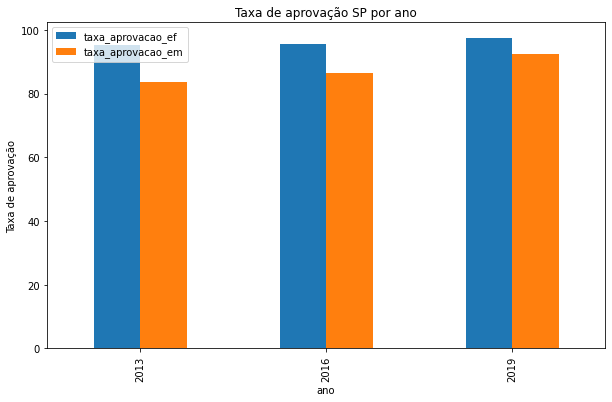

In [56]:
plot_educacao_anos('SP', cols1, cols2, 'Taxa de aprovação', 'Taxa de aprovação SP por ano')

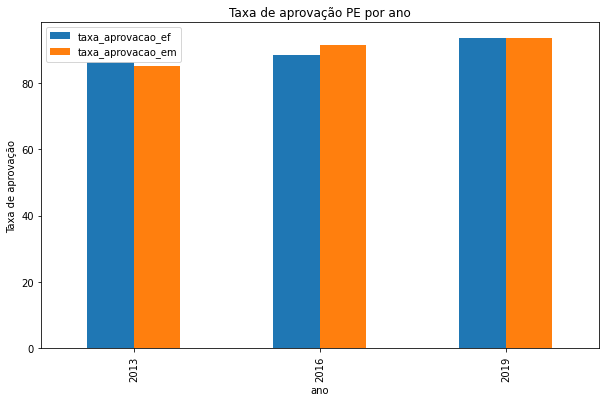

In [57]:
plot_educacao_anos('PE', cols1, cols2, 'Taxa de aprovação', 'Taxa de aprovação PE por ano')

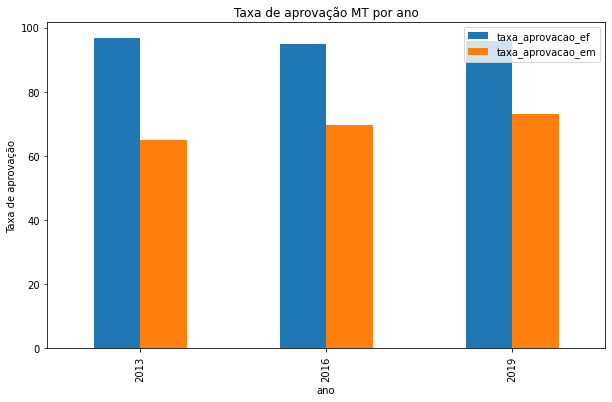

In [58]:
plot_educacao_anos('MT', cols1, cols2, 'Taxa de aprovação', 'Taxa de aprovação MT por ano')

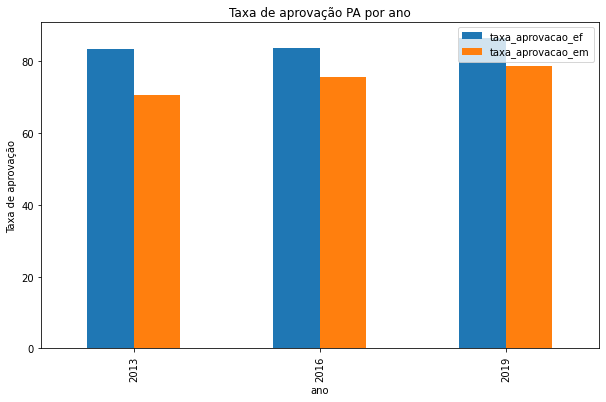

In [59]:
plot_educacao_anos('PA', cols1, cols2, 'Taxa de aprovação', 'Taxa de aprovação PA por ano')

###Taxa de reprovação por UF

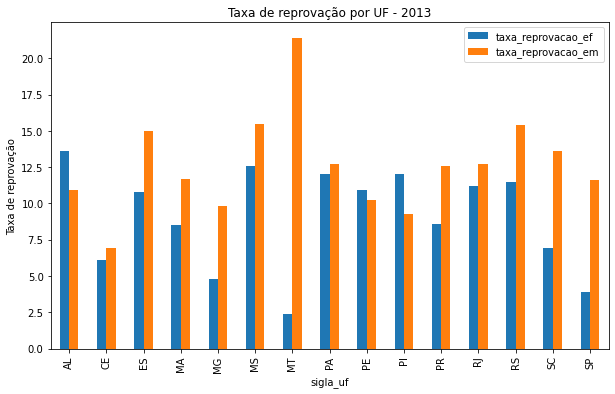

In [60]:
cols = ['sigla_uf', 'taxa_reprovacao_ef', 'taxa_reprovacao_em']
plotar_barras_grupos_generico(educacao_ufs_validos_2013[cols], 'sigla_uf', ['taxa_reprovacao_ef', 'taxa_reprovacao_em'], 'Taxa de reprovação', 'Taxa de reprovação por UF - 2013')

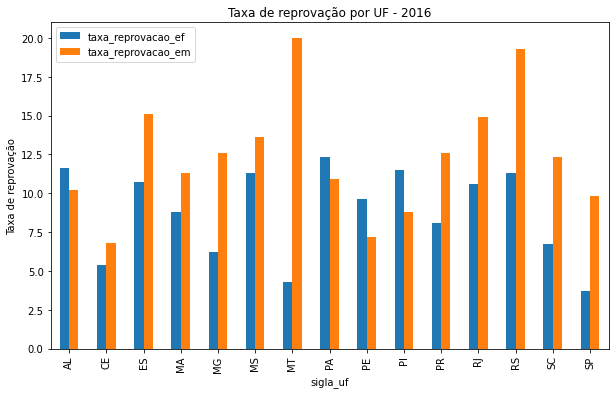

In [61]:
cols = ['sigla_uf', 'taxa_reprovacao_ef', 'taxa_reprovacao_em']
plotar_barras_grupos_generico(educacao_ufs_validos_2016[cols], 'sigla_uf', ['taxa_reprovacao_ef', 'taxa_reprovacao_em'], 'Taxa de reprovação', 'Taxa de reprovação por UF - 2016')

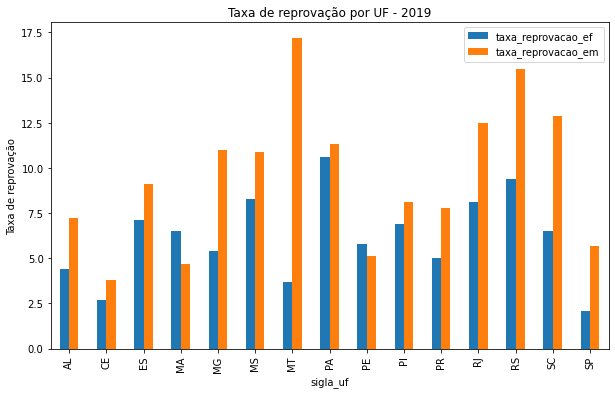

In [62]:
cols = ['sigla_uf', 'taxa_reprovacao_ef', 'taxa_reprovacao_em']
plotar_barras_grupos_generico(educacao_ufs_validos_2019[cols], 'sigla_uf', ['taxa_reprovacao_ef', 'taxa_reprovacao_em'], 'Taxa de reprovação', 'Taxa de reprovação por UF - 2019')

In [63]:
# Variação entre os anos geral
colunas = ['taxa_reprovacao_ef', 'taxa_reprovacao_em']

print('--- Geral ---')
sum_2013 = educacao_ufs_validos_2013[colunas].sum().sum()
sum_2016 = educacao_ufs_validos_2016[colunas].sum().sum()
sum_2019 = educacao_ufs_validos_2019[colunas].sum().sum()

print(sum_2013)
print(sum_2016)
print(sum_2019)

print(f'Variação taxa de reprovação entre 2013 e 2016: {sum_2016/sum_2013*100-100}%')
print(f'Variação taxa de reprovação entre 2016 e 2019: {sum_2019/sum_2016*100-100}%')

# Variação entre os anos SP (maior)
print('--- SP ---')
sum_sp_2013 = float(educacao_ufs_validos_2013.loc[educacao_ufs_validos_2013['sigla_uf'] == 'SP'][colunas].sum().sum())
sum_sp_2016 = float(educacao_ufs_validos_2016.loc[educacao_ufs_validos_2016['sigla_uf'] == 'SP'][colunas].sum().sum())
sum_sp_2019 = float(educacao_ufs_validos_2019.loc[educacao_ufs_validos_2019['sigla_uf'] == 'SP'][colunas].sum().sum())

print(sum_sp_2013)
print(sum_sp_2016)
print(sum_sp_2019)

print(f'Variação taxa de reprovação SP entre 2013 e 2016: {sum_sp_2016/sum_sp_2013*100-100}%')
print(f'Variação taxa de reprovação SP entre 2016 e 2019: {sum_sp_2019/sum_sp_2016*100-100}%')

# Variação entre os anos PI (menor)
print('--- PI ---')
sum_pi_2013 = float(educacao_ufs_validos_2013.loc[educacao_ufs_validos_2013['sigla_uf'] == 'PI'][colunas].sum().sum())
sum_pi_2016 = float(educacao_ufs_validos_2016.loc[educacao_ufs_validos_2016['sigla_uf'] == 'PI'][colunas].sum().sum())
sum_pi_2019 = float(educacao_ufs_validos_2019.loc[educacao_ufs_validos_2019['sigla_uf'] == 'PI'][colunas].sum().sum())

print(sum_pi_2013)
print(sum_pi_2016)
print(sum_pi_2019)

print(f'Variação taxa de reprovação PI entre 2013 e 2016: {sum_pi_2016/sum_pi_2013*100-100}%')
print(f'Variação taxa de reprovação PI entre 2016 e 2019: {sum_pi_2019/sum_pi_2016*100-100}%')

--- Geral ---
325.1
317.5
235.29999999999998
Variação taxa de reprovação entre 2013 e 2016: -2.337742233159034%
Variação taxa de reprovação entre 2016 e 2019: -25.88976377952757%
--- SP ---
15.5
13.5
7.800000000000001
Variação taxa de reprovação SP entre 2013 e 2016: -12.903225806451616%
Variação taxa de reprovação SP entre 2016 e 2019: -42.222222222222214%
--- PI ---
21.3
20.3
15.0
Variação taxa de reprovação PI entre 2013 e 2016: -4.694835680751169%
Variação taxa de reprovação PI entre 2016 e 2019: -26.108374384236456%


###Análise das duas maiores e menores taxas de reprovação

In [64]:
cols1 = ['ano', 'taxa_reprovacao_ef', 'taxa_reprovacao_em']
cols2 = ['taxa_reprovacao_ef', 'taxa_reprovacao_em']

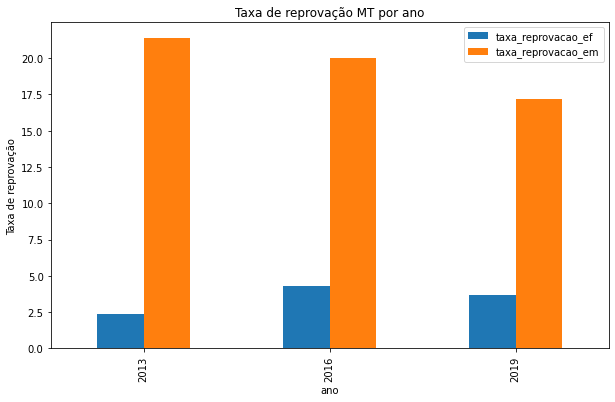

In [65]:
plot_educacao_anos('MT', cols1, cols2, 'Taxa de reprovação', 'Taxa de reprovação MT por ano')

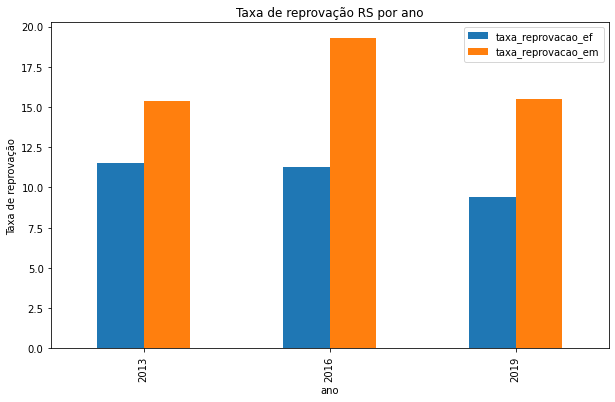

In [66]:
plot_educacao_anos('RS', cols1, cols2, 'Taxa de reprovação', 'Taxa de reprovação RS por ano')

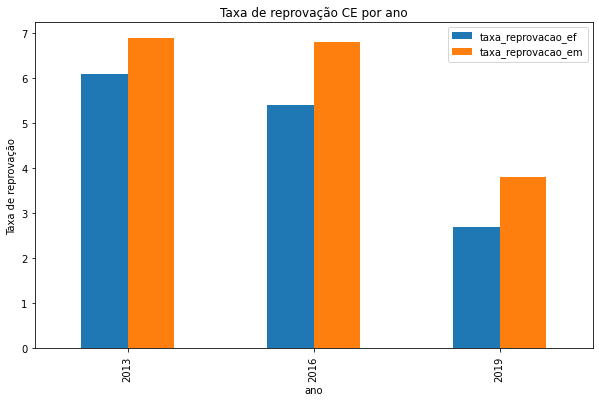

In [67]:
plot_educacao_anos('CE', cols1, cols2, 'Taxa de reprovação', 'Taxa de reprovação CE por ano')

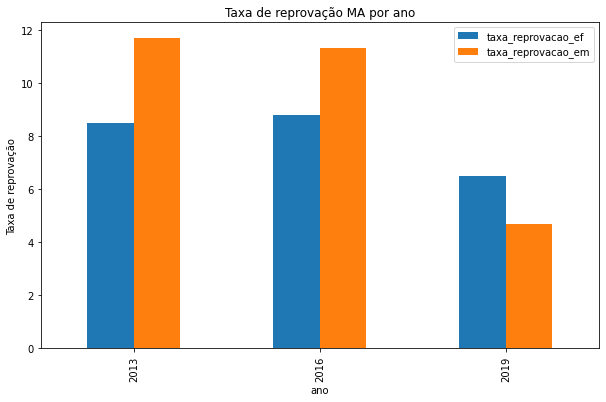

In [68]:
plot_educacao_anos('MA', cols1, cols2, 'Taxa de reprovação', 'Taxa de reprovação MA por ano')

###Análise PIB X População (PIB per capita)

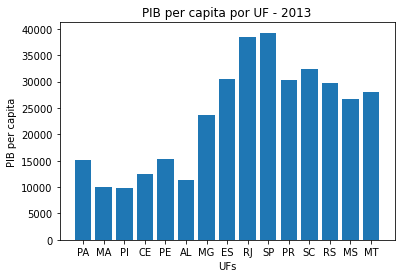

In [69]:
cols = ['ano', 'sigla_uf', 'pib', 'populacao', 'pea', 'pib_per_capita']
pib_per_capita_2013 = pd.DataFrame(columns=cols)

for uf in pibs_ufs_validos_2013['sigla_uf']:
  pib_uf = pibs_ufs_validos_2013.loc[pibs_ufs_validos_2013['sigla_uf'] == str(uf)]
  pop_uf = populacao_ufs_validos_2013.loc[populacao_ufs_validos_2013['sigla_uf'] == str(uf)]
  ppc = pib_uf['pib'].values[0]/pop_uf['populacao'].values[0]
  pib_per_capita_2013 = pib_per_capita_2013.append({'ano': 2013, 'sigla_uf': uf, 'pib': pib_uf['pib'].values[0], 'populacao': pop_uf['populacao'].values[0], 'pea': pop_uf['populacao_economicamente_ativa'].values[0], 'pib_per_capita': ppc}, ignore_index=True)

# display(pib_per_capita_2013)
plot_grafico_barras_normal(pib_per_capita_2013['sigla_uf'], pib_per_capita_2013['pib_per_capita'], 'UFs', 'PIB per capita', 'PIB per capita por UF - 2013')

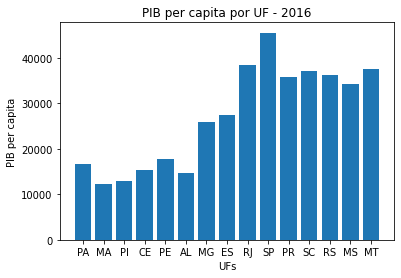

In [70]:
cols = ['ano', 'sigla_uf', 'pib', 'populacao', 'pea' 'pib_per_capita']
pib_per_capita_2016 = pd.DataFrame(columns=cols)

for uf in pibs_ufs_validos_2016['sigla_uf']:
  pib_uf = pibs_ufs_validos_2016.loc[pibs_ufs_validos_2016['sigla_uf'] == str(uf)]
  pop_uf = populacao_ufs_validos_2016.loc[populacao_ufs_validos_2016['sigla_uf'] == str(uf)]
  ppc = pib_uf['pib'].values[0]/pop_uf['populacao'].values[0]
  pib_per_capita_2016 = pib_per_capita_2016.append({'ano': 2016, 'sigla_uf': uf, 'pib': pib_uf['pib'].values[0], 'populacao': pop_uf['populacao'].values[0], 'pea': pop_uf['populacao_economicamente_ativa'].values[0], 'pib_per_capita': ppc}, ignore_index=True)

# display(pib_per_capita_2016)
plot_grafico_barras_normal(pib_per_capita_2016['sigla_uf'], pib_per_capita_2016['pib_per_capita'], 'UFs', 'PIB per capita', 'PIB per capita por UF - 2016')

,ano,sigla_uf,pib,populacao,pea,pib_per_capita
0,2019,PA,178376983522,8602865,6546.0,20734.602196
1,2019,MA,97339938019,7075181,5347.0,13757.943156
2,2019,PI,52780784685,3273227,2591.0,16124.999789
3,2019,CE,163575327180,9132078,7297.0,17912.169298
4,2019,PE,197853378471,9557071,7624.0,20702.302878
5,2019,AL,58963728728,3337357,2601.0,17667.791827
6,2019,MG,651872684368,21168791,17383.0,30794.044136
7,2019,ES,137345595431,4018650,3233.0,34177.048370
8,2019,RJ,779927917084,17264943,14530.0,45174.080047
9,2019,SP,2348338000290,45919049,37580.0,51140.823938


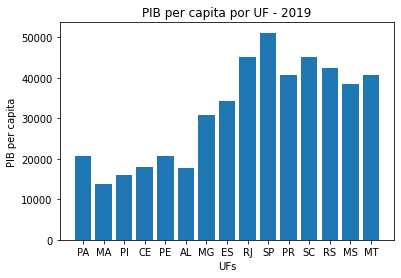

In [71]:
cols = ['ano', 'sigla_uf', 'pib', 'populacao', 'pea', 'pib_per_capita']
pib_per_capita_2019 = pd.DataFrame(columns=cols)

for uf in pibs_ufs_validos_2019['sigla_uf']:
  pib_uf = pibs_ufs_validos_2019.loc[pibs_ufs_validos_2019['sigla_uf'] == str(uf)]
  pop_uf = populacao_ufs_validos_2019.loc[populacao_ufs_validos_2019['sigla_uf'] == str(uf)]
  ppc = pib_uf['pib'].values[0]/pop_uf['populacao'].values[0]
  pib_per_capita_2019 = pib_per_capita_2019.append({'ano': 2019, 'sigla_uf': uf, 'pib': pib_uf['pib'].values[0], 'populacao': pop_uf['populacao'].values[0], 'pea': pop_uf['populacao_economicamente_ativa'].values[0], 'pib_per_capita': ppc}, ignore_index=True)

display(pib_per_capita_2019)
plot_grafico_barras_normal(pib_per_capita_2019['sigla_uf'], pib_per_capita_2019['pib_per_capita'], 'UFs', 'PIB per capita', 'PIB per capita por UF - 2019')

In [72]:
# 
sum_ppc_2013 = pib_per_capita_2013[['sigla_uf', 'pib_per_capita']]
sum_ppc_2016 = pib_per_capita_2016[['sigla_uf', 'pib_per_capita']]
sum_ppc_2019 = pib_per_capita_2019[['sigla_uf', 'pib_per_capita']]

siglas = [x for x in sum_ppc_2013['sigla_uf']]

# 2013
media_2013 = sum_ppc_2013['pib_per_capita'].describe()['mean']
abaixo_media_2013 = {}
acima_media_2013 = {}
i = 0
for p in sum_ppc_2013['pib_per_capita']:
  if p < media_2013:
    abaixo_media_2013[siglas[i]] = p
  else:
    acima_media_2013[siglas[i]] = p
  i+=1

keys_abam_2013 = abaixo_media_2013.keys()
keys_acim_2013 = acima_media_2013.keys()

print('Média do PIB per capita 2013:', media_2013)
print('Abaixo da média 2013:', keys_abam_2013)
print('Acima da média 2013:', keys_acim_2013)

# 2016
media_2016 = sum_ppc_2016['pib_per_capita'].describe()['mean']
abaixo_media_2016 = {}
acima_media_2016 = {}
i = 0
for p in sum_ppc_2016['pib_per_capita']:
  if p < media_2016:
    abaixo_media_2016[siglas[i]] = p
  else:
    acima_media_2016[siglas[i]] = p
  i+=1

keys_abam_2016 = abaixo_media_2016.keys()
keys_acim_2016 = acima_media_2016.keys()

print('Média do PIB per capita 2016:', media_2016)
print('Abaixo da média 2016:', keys_abam_2016)
print('Acima da média 2016:', keys_acim_2016)

# 2019
media_2019 = sum_ppc_2019['pib_per_capita'].describe()['mean']
abaixo_media_2019 = {}
acima_media_2019 = {}
i = 0
for p in sum_ppc_2019['pib_per_capita']:
  if p < media_2019:
    abaixo_media_2019[siglas[i]] = p
  else:
    acima_media_2019[siglas[i]] = p
  i+=1

keys_abam_2019 = abaixo_media_2019.keys()
keys_acim_2019 = acima_media_2019.keys()

print('Média do PIB per capita 2019:', media_2019)
print('Abaixo da média 2019:', keys_abam_2019)
print('Acima da média 2019:', keys_acim_2019)

Média do PIB per capita 2013: 23543.457548983763
Abaixo da média 2013: dict_keys(['PA', 'MA', 'PI', 'CE', 'PE', 'AL'])
Acima da média 2013: dict_keys(['MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT'])
Média do PIB per capita 2016: 27210.253712379006
Abaixo da média 2016: dict_keys(['PA', 'MA', 'PI', 'CE', 'PE', 'AL', 'MG'])
Acima da média 2016: dict_keys(['ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT'])
Média do PIB per capita 2019: 31717.948204991062
Abaixo da média 2019: dict_keys(['PA', 'MA', 'PI', 'CE', 'PE', 'AL', 'MG'])
Acima da média 2019: dict_keys(['ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT'])


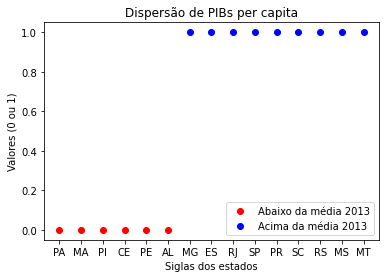

In [73]:
abaixo_media_2013 = abaixo_media_2013.keys()
acima_media_2013 = acima_media_2013.keys()

# atribuindo valores 0 para estados abaixo da média e 1 para estados acima da média
abaixo_media_2013_values = [0]*len(abaixo_media_2013)
acima_media_2013_values = [1]*len(acima_media_2013)

plt.scatter(abaixo_media_2013, abaixo_media_2013_values, c='red', label='Abaixo da média 2013')
plt.scatter(acima_media_2013, acima_media_2013_values, c='blue', label='Acima da média 2013')

# configuração do título e dos eixos
plt.title('Dispersão de PIBs per capita')
plt.xlabel('Siglas dos estados')
plt.ylabel('Valores (0 ou 1)')

# adicionando legendas
plt.legend()

# exibição do gráfico
plt.show()

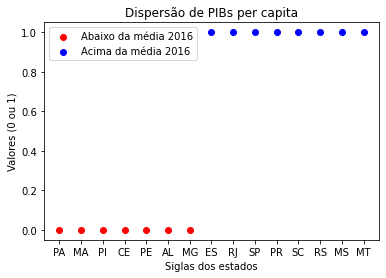

In [74]:
abaixo_media_2016 = abaixo_media_2016.keys()
acima_media_2016 = acima_media_2016.keys()

# atribuindo valores 0 para estados abaixo da média e 1 para estados acima da média
abaixo_media_2016_values = [0]*len(abaixo_media_2016)
acima_media_2016_values = [1]*len(acima_media_2016)

plt.scatter(abaixo_media_2016, abaixo_media_2016_values, c='red', label='Abaixo da média 2016')
plt.scatter(acima_media_2016, acima_media_2016_values, c='blue', label='Acima da média 2016')

# configuração do título e dos eixos
plt.title('Dispersão de PIBs per capita')
plt.xlabel('Siglas dos estados')
plt.ylabel('Valores (0 ou 1)')

# adicionando legendas
plt.legend()

# exibição do gráfico
plt.show()

In [75]:
pib_per_capita_2013

,ano,sigla_uf,pib,populacao,pea,pib_per_capita
0,2013,PA,121224846594,7969654,5844.0,15210.804207
1,2013,MA,67694844541,6794301,4922.0,9963.474468
2,2013,PI,31283593019,3184166,2483.0,9824.736844
3,2013,CE,109036556353,8778576,6833.0,12420.756664
4,2013,PE,141150251796,9208550,7120.0,15328.173469
5,2013,AL,37282529122,3300935,2426.0,11294.535979
6,2013,MG,488004903011,20593356,16399.0,23697.201321
7,2013,ES,117274346943,3839366,2996.0,30545.237662
8,2013,RJ,628226069362,16369179,13572.0,38378.593658
9,2013,SP,1715238416566,43663669,35373.0,39282.965812


###Análise de população e PEA dos dois maiores e menores PIBs per capita

In [76]:
cols1 = ['ano', 'populacao', 'populacao_economicamente_ativa']
cols2 = ['populacao', 'populacao_economicamente_ativa']

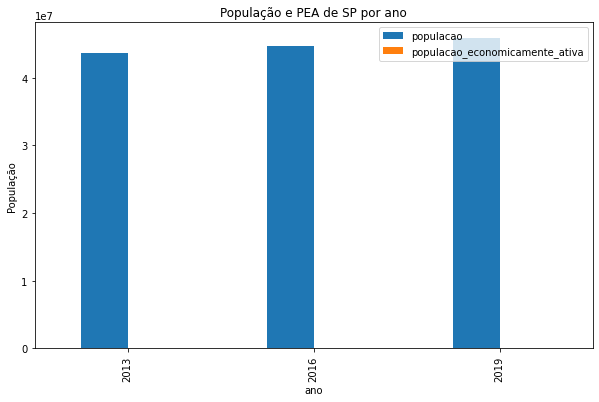

In [77]:
plot_populacao_anos('SP', cols1, cols2, 'População', 'População e PEA de SP por ano')

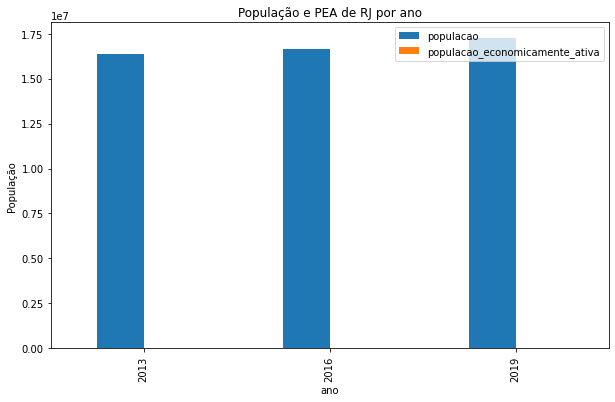

In [78]:
plot_populacao_anos('RJ', cols1, cols2, 'População', 'População e PEA de RJ por ano')

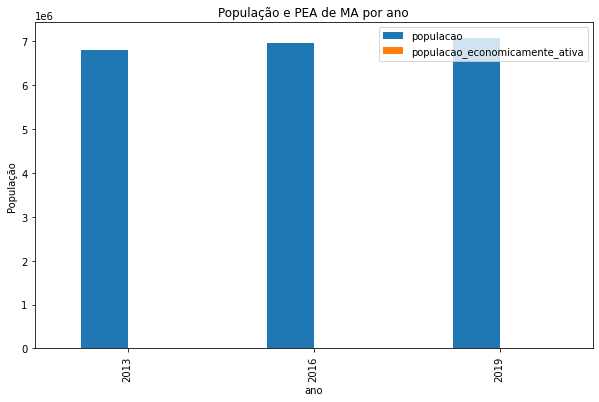

In [79]:
plot_populacao_anos('MA', cols1, cols2, 'População', 'População e PEA de MA por ano')

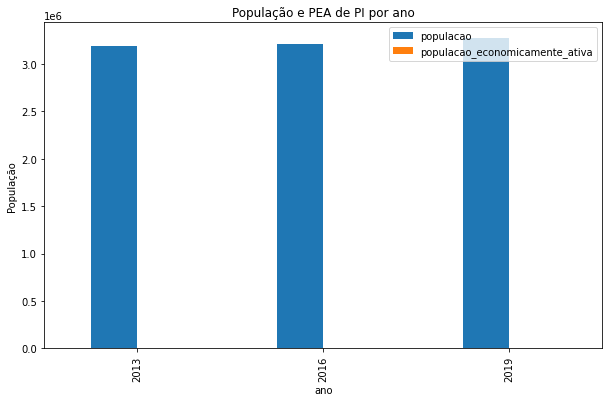

In [80]:
plot_populacao_anos('PI', cols1, cols2, 'População', 'População e PEA de PI por ano')